In [2]:
#Realizando os imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import copy
from scipy.linalg import svd, diagsvd
from functions import *

#Criando o dataframe com os dados
df = pd.read_csv("ratings_small.csv")

#Cria a matriz inicial
A = df.pivot_table(index='userId', columns='movieId', values='rating').fillna(0)
A = A.values

erros = []
for i in range(1000):
    #Introduz o ruido
    B = copy.deepcopy(A)
    B, coordenada_ruido = introduzRuido(B,1)
    coordenada_ruido = coordenada_ruido[0]
    u, s, vt = svd(B)
    u_, s_, vt_ = comprimir(u,s,vt,100)
    B2 = u_ @ np.diag(s_) @ vt_ 
    erros.append(abs(B2[coordenada_ruido[0],coordenada_ruido[1]] - A[coordenada_ruido[0],coordenada_ruido[1]]))

df_erros = pd.DataFrame({
    "erro": erros
})


df_erros.to_csv("erros.csv", index=False)

In [8]:
df_teste_erro = pd.read_csv("erros.csv")

### Histograma dos erros

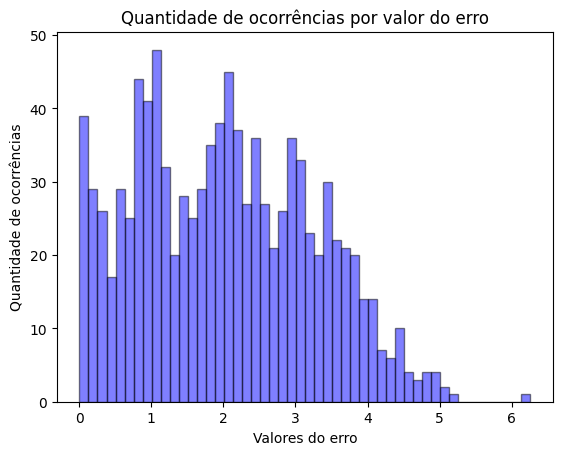

In [9]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist(df_teste_erro, bins=50,alpha=0.5, color= 'blue',edgecolor='black')
plt.title('Quantidade de ocorrências por valor do erro')
plt.xlabel('Valores do erro')
plt.ylabel('Quantidade de ocorrências')
plt.show()

In [15]:
num_ruidos = 50000
erros = []
for i in range(100):
    #Introduz o ruido
    B = copy.deepcopy(A)
    B, coordenada_ruido = introduzRuido(B,num_ruidos)
    u, s, vt = svd(B)
    u_, s_, vt_ = comprimir(u,s,vt,100)
    B2 = u_ @ np.diag(s_) @ vt_ 
    l_total = []
    for i in range(num_ruidos):
        coordenada = coordenada_ruido[i]
        l_total.append(abs(B2[coordenada[0],coordenada[1]] - A[coordenada[0],coordenada[1]]))
    erros.append(np.mean(l_total))

df_erros = pd.DataFrame({
    "erro": erros
})


df_erros.to_csv("erros5stress.csv", index=False)

### Comparação dos histogramas 

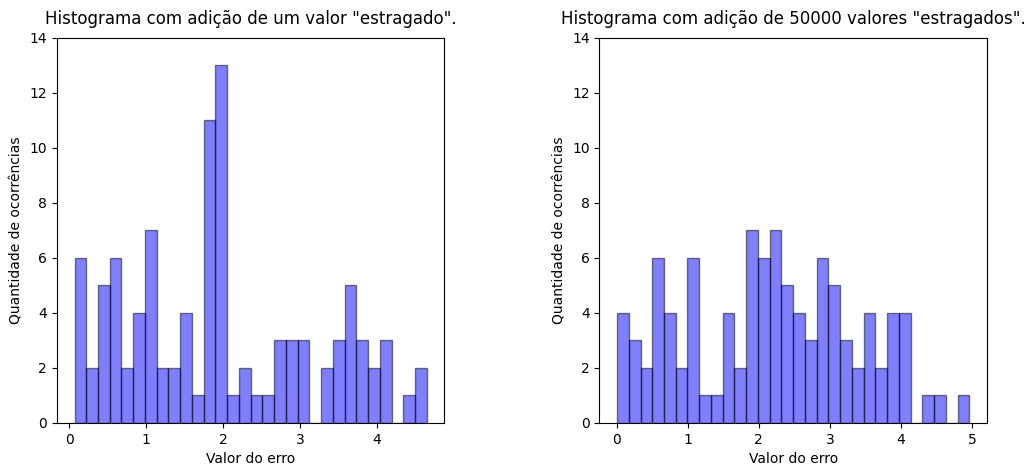

In [10]:
df_erro1 = pd.read_csv("erros1stress.csv")
df_erro50000 = pd.read_csv("erros50000stress.csv")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.hist(df_erro1, bins=30, alpha=0.5,
         color='blue', edgecolor='black')
ax1.set_title('Histograma com adição de um valor "estragado".',pad=10)
ax1.set_xlabel('Valor do erro')
ax1.set_ylabel('Quantidade de ocorrências')
ax1.set_ylim([0,14])
ax2.hist(df_erro50000, bins=30, alpha=0.5,
         color='blue', edgecolor='black')
ax2.set_title('Histograma com adição de 50000 valores "estragados".',pad=10)
ax2.set_xlabel('Valor do erro')
ax2.set_ylabel('Quantidade de ocorrências')
ax2.set_ylim([0,14])

plt.subplots_adjust(wspace=0.4)

# mostrar os gráficos
plt.show()


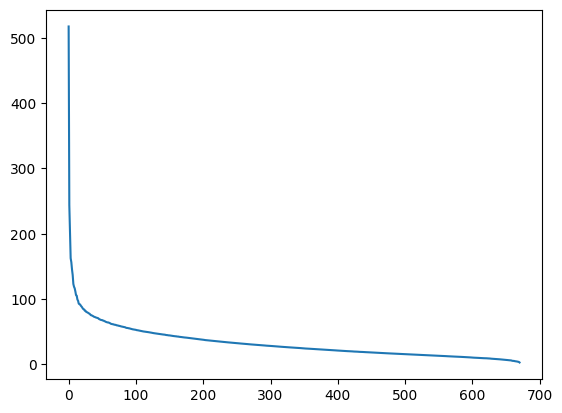

In [1]:
#Realizando os imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import copy
from scipy.linalg import svd, diagsvd
from functions import *

#Criando o dataframe com os dados
df = pd.read_csv("ratings_small.csv")

#Cria a matriz inicial
A = df.pivot_table(index='userId', columns='movieId', values='rating').fillna(0)
A = A.values


u, s, v = svd(A)

plt.figure()
plt.plot(s)
plt.show()